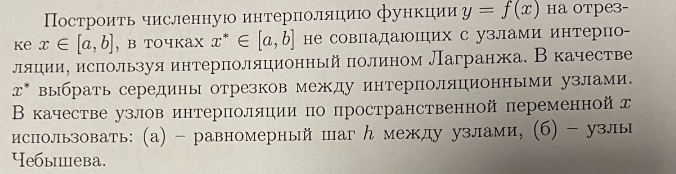

## *Равномерный шаг h между узлами*

In [31]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import lambdify, Symbol

N = 50
x_int = np.linspace(0,10,N)
y_int = np.cos(np.exp(x_int/2)/25)



In [32]:
def lagrange (x, x_int, y_int):
    res = 0
    for i in range(len(x_int)):
        pls = y_int[i]
        for j in range(len(x_int)):
            if x_int[j] != x_int[i]:
                c = x - x_int[j]
                d = x_int[i] - x_int[j]
                pls = pls * c / d
        res += pls
    return res  

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

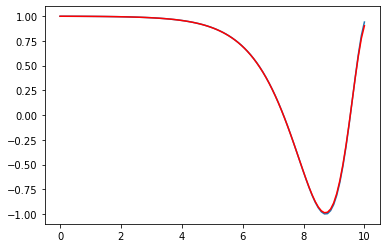

In [33]:
dix_X=[]
dix_Y=[]
for i in range(len(x_int)-1):
  dix_X.append((x_int[i] + x_int[i+1])/2)
  dix_Y.append((y_int[i] + y_int[i+1])/2)

new_x = np.linspace(0, 10, 100) 
print (new_x)
new_y = [lagrange(x,dix_X,dix_Y) for x in new_x]

y = lambda new_x: np.cos(np.exp(new_x/2)/25)

plt.plot(new_x, y(new_x))
plt.plot(new_x, new_y, color='red')
plt.show()

## *Узлы Чебышева*

In [41]:
import math
import numpy as np
n = 10
a = 0
b = 10
x_cheb = []
y_cheb = []
def func(x):
  return math.cos(math.exp(x/2)/25)

for i in range (1,n+1):
  x_cheb.append(1/2*(a+b)+1/2*(b-a)*math.cos(((2*i-1)/(2*n))*math.pi))
  y_cheb.append (func(x_cheb[i-1]))

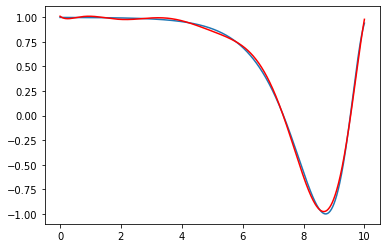

In [42]:
new_x = np.linspace(0, 10, 1000) 
new_y = [lagrange(x,x_cheb,y_cheb) for x in new_x]
y = lambda new_x: np.cos(np.exp(new_x/2)/25)

plt.plot(new_x, y(new_x))
plt.plot(new_x, new_y, color='red')
plt.show()